# Homework 16: Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction

from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

utils.load_custom_styles()

---
## Exercise 2.1

<img src="figures/homework-16/equation-2.16.png" width="600" />

<img src="figures/homework-16/equation-2.17.png" width="600" />







<img src="figures/homework-16/exercise-2.1.png" width="600" />






---
## Exercise 2.2


<img src="figures/homework-16/exercise-2.2.png" width="600" />















In [2]:
X = [[-1,   0, -0.5, -1.5, -2,  0,   -1, 1, 1.3, 0.7, 2.5, 0],
     [ 0 , -1, -0.5, -1.5,  0, -2, -1.3, 1, 0.7, 1.3,   1, 1]]
X = np.array(X)
X.shape

In [3]:
M = np.array([[-1, -0.9],
              [-1,    0]])

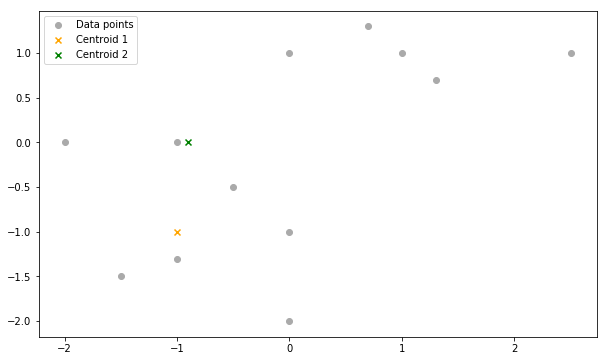

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[0], X[1], color='#aaaaaa', label='Data points')
centroid1 = M[:,0] 
centroid2 = M[:,1] 
ax.scatter(centroid1[0], centroid1[1], marker='x', color='orange', label='Centroid 1')
ax.scatter(centroid2[0], centroid2[1], marker='x', color='green', label='Centroid 2')
ax.legend();

In [5]:
from sklearn.metrics import pairwise_distances

def batchKMeans(X, M, max_iterations=10):
    centroids = M.copy()
    assert(X.shape[0] == centroids.shape[0])
    K = centroids.shape[1]
    print('K=%s' % K)
    clusters = []
    for k in range(K):
        clusters.append({'centroid': centroids.T[k], 'members': []})
    results = {
        'iterations': [],
        'final_clustering': None
    }
    print('Initial Centroids')
    print(centroids)
    for i in range(max_iterations):
        # Compute pairwise distances
        distances = pairwise_distances(X.T, centroids.T)
        
        # Determine which cluster each data point belongs to 
        cluster_indices = distances.argmin(axis=1)
        
        # Reset data point from previous iteration
        for k in range(K):
            clusters[k]['members'] = []
            
        # Assign each data point to a cluster based on the closest centroid
        for data_idx, cluster_idx in enumerate(cluster_indices):
            clusters[cluster_idx]['members'].append(X[:,data_idx])
        print('\n\nIteration %s' % (i+1))
        
            
        print('\nLabels')
        print(cluster_indices)
        
        print('\nDistances')
        print(distances.T)
        
        # Recompute the centroids
        for k in range(K):
            new_centroid = np.mean(clusters[k]['members'], axis=0)
            centroids[:, k] = new_centroid
            clusters[k]['centroid'] = new_centroid
            
        print('\nNew centroids')
        print(centroids)
        
        results['iterations'].append({
            'distances': distances.T,
            'cluster_indices': cluster_indices,
            'clustering': clusters
        })
    results['final_clustering'] = clusters
    return results

In [6]:
result = batchKMeans(X, M, 3)

K=2
Initial Centroids
[[-1.  -0.9]
 [-1.   0. ]]


Iteration 1

Labels
[1 0 1 0 1 0 0 1 1 1 1 1]

Distances
[[1.         1.         0.70710678 0.70710678 1.41421356 1.41421356
  0.3        2.82842712 2.86006993 2.86006993 4.03112887 2.23606798]
 [0.1        1.3453624  0.64031242 1.61554944 1.1        2.19317122
  1.30384048 2.14709106 2.30867928 2.06155281 3.54400903 1.3453624 ]]

New centroids
[[-0.625   0.25  ]
 [-1.45    0.5625]]


Iteration 2

Labels
[1 0 0 0 0 0 0 1 1 1 1 1]

Distances
[[1.49770658 0.77014609 0.95818839 0.87642741 1.99828051 0.83254129
  0.40388736 2.93991922 2.8858491  3.0525604  3.97090985 2.52846297]
 [1.37073201 1.58237361 1.30054075 2.70488563 2.31924691 2.57466624
  2.24307964 0.86827775 1.05896471 0.86394806 2.2921401  0.50389111]]

New centroids
[[-0.83333333  0.75      ]
 [-1.05        0.83333333]]


Iteration 3

Labels
[0 0 0 0 0 0 0 1 1 1 1 1]

Distances
[[1.06314523 0.83483199 0.64312605 0.80432857 1.56958947 1.26370267
  0.30046261 2.75020201 2.759277

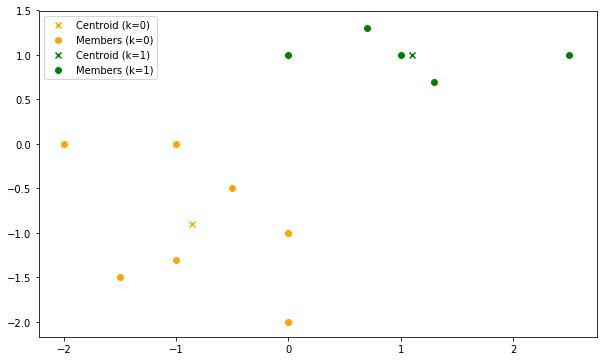

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['orange', 'green']
clusters = result['final_clustering']

K = len(clusters)
for k in range(K):
    centroid = clusters[k]['centroid']
    data_points = np.array(clusters[k]['members']).T
    
    ax.scatter(centroid[0], centroid[1], marker='x', color=colors[k], label='Centroid (k=%s)' % k)
    ax.scatter(data_points[0], data_points[1], color=colors[k], label='Members (k=%s)' % k)
    
ax.legend();


---
## Exercise 2.3


<img src="figures/homework-16/exercise-2.3.png" width="600" />




In [8]:
def fuzzyKMeans(X, M, gamma, max_iterations=10):
    centroids = M.copy()
    assert(X.shape[0] == centroids.shape[0])
    N = X.shape[1]
    K = centroids.shape[1]
    
    print('Initial Centroids')
    print(centroids)
    for iteration in range(max_iterations):
        # Compute membership vectors
        a_ik = np.zeros((N, K))
        for i in range(N):
            for k in range(K):
                x_i = X.T[i]
                mu_k = centroids.T[k]
                distance = np.linalg.norm(x_i - mu_k)
                a_ik[i, k] = np.power(distance, -gamma)

        # Normalise membership vectors
        a_ik = (a_ik.T / a_ik.sum(axis=1)).T
        
        print('\nMembership vectors')
        print(a_ik)
        
        for k in range(K):
            new_centroid = np.sum(a_ik[:,k] * X, axis=1)
            centroids[:, k] = new_centroid
        
        print('\nNew centroids')
        print(centroids)

In [9]:
fuzzyKMeans(X, M, gamma=2, max_iterations=3)

Initial Centroids
[[-1.  -0.9]
 [-1.   0. ]]

Membership vectors
[[0.00990099 0.99009901]
 [0.64412811 0.35587189]
 [0.45054945 0.54945055]
 [0.8392283  0.1607717 ]
 [0.37694704 0.62305296]
 [0.70631424 0.29368576]
 [0.94972067 0.05027933]
 [0.36558287 0.63441713]
 [0.39452258 0.60547742]
 [0.34191472 0.65808528]
 [0.43595974 0.56404026]
 [0.26578561 0.73421439]]

New centroids
[[-0.98993104  0.48993104]
 [-2.98752748  1.68752748]]

Membership vectors
[[0.36215392 0.63784608]
 [0.60217841 0.39782159]
 [0.47282941 0.52717059]
 [0.85096736 0.14903264]
 [0.47635837 0.52364163]
 [0.87620047 0.12379953]
 [0.79648131 0.20351869]
 [0.03558792 0.96441208]
 [0.07968627 0.92031373]
 [0.00906574 0.99093426]
 [0.13846722 0.86153278]
 [0.04051178 0.95948822]]

New centroids
[[-3.13252356  2.63252356]
 [-4.62073803  3.32073803]]

Membership vectors
[[0.48327712 0.51672288]
 [0.52758071 0.47241929]
 [0.50517453 0.49482547]
 [0.76472291 0.23527709]
 [0.58938221 0.41061779]
 [0.6787265  0.3212735 ]
 [0

---
## Exercise 2.4


<img src="figures/homework-16/exercise-2.4.png" width="600" />





---
### Exercise 2.4a

<img src="figures/homework-16/exercise-2.4-a.png" width="600" />



---
### Exercise 2.4b

<img src="figures/homework-16/exercise-2.4-b.png" width="600" />




---
### Exercise 2.4c

<img src="figures/homework-16/exercise-2.4-c.png" width="600" />



---
## Exercise 2.5


<img src="figures/homework-16/exercise-2.5.png" width="600" />













